Code Modified From: https://youtu.be/PuZY9q-aKLw

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from preprocess import load_data

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
item = "SPONGE"

data_set = load_data()
data = data_set[item]

for i in range(0, len(data)):
    if data["buy_volume"][i] == 0 and data["sell_volume"][i] == 0:
        data = data.drop(i)

In [3]:
print(data.head())
print(data.shape)

            Date  sell_price  sell_volume  sell_moving_week  sell_orders  \
0  2024-02-14-23   42.406750    5747081.0         7480195.0        132.0   
1  2024-02-15-00   42.487058    5769887.0         7532305.0        133.0   
2  2024-02-15-01   42.736993    5831963.0         7580315.0        135.0   
3  2024-02-15-02   42.411493    5720894.0         7620649.0        133.0   
4  2024-02-15-03   42.315665    5657846.0         7683697.0        130.0   

   buy_price  buy_volume  buy_moving_week  buy_orders  max_sell_price  \
0  59.985276    332194.0         967014.0       100.0            42.5   
1  65.142329    322401.0         976807.0        98.0            42.6   
2  67.978409    312956.0         986083.0        94.0            42.8   
3  67.700000    321901.0         987142.0        92.0            42.6   
4  67.400000    330600.0         988292.0        99.0            42.4   

   min_buy_price  
0           59.8  
1           60.0  
2           65.1  
3           67.7  
4        

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(data['sell_price'].values.reshape(-1, 1))
scaled_data = scaled_data.flatten()
print(scaled_data.shape)

(976,)


In [22]:
prediction_hours = 48
train_test_split = 0.8

len_train = int(len(scaled_data) * train_test_split)  

x_train = []
y_train = []

x_test = [] 
y_test = []

for i in range(prediction_hours, len_train):
    x_train.append(scaled_data[i - prediction_hours:i])
    y_train.append(scaled_data[i]) 

for i in range(len_train, len(scaled_data)):
    x_test.append(scaled_data[i - prediction_hours:i])
    y_test.append(scaled_data[i])

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape) 
print(y_test.shape)


780
196
(732, 48)
(732,)
(196, 48)
(196,)


In [33]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 48, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 48, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 48, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 48, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [35]:
model.fit(x_train, y_train, epochs=25, batch_size=32, verbose=1)

Epoch 1/50
23/23 [==============================] - 3s 16ms/step - loss: 0.0969
Epoch 2/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0189
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0148
Epoch 4/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0138
Epoch 5/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0119
Epoch 6/50
23/23 [==============================] - 0s 16ms/step - loss: 0.0120
Epoch 7/50
23/23 [==============================] - 0s 16ms/step - loss: 0.0118
Epoch 8/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0113
Epoch 9/50
23/23 [==============================] - 0s 15ms/step - loss: 0.0117
Epoch 10/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0114
Epoch 11/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0107
Epoch 12/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0101
Epoch 13/50
23/23 [==================

In [36]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)

7/7 [==============================] - 1s 6ms/step


In [37]:
print(predicted.shape)
print(y_test.shape)

(196, 1)
(196,)


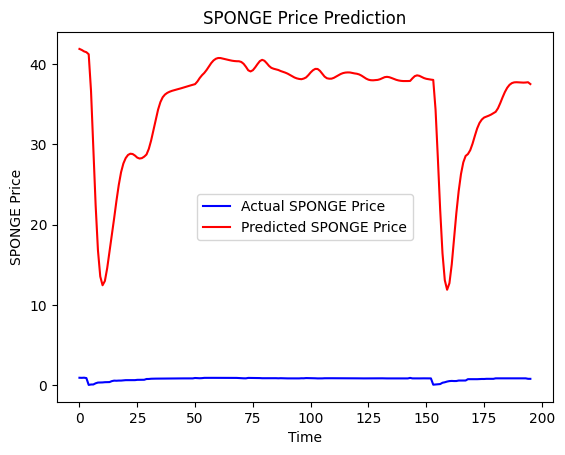

In [38]:
plt.plot(y_test, color='blue', label=f"Actual {item} Price")
plt.plot(predicted, color='red', label=f"Predicted {item} Price")
plt.title(f"{item} Price Prediction")
plt.xlabel('Time')
plt.ylabel(f"{item} Price")
plt.legend()
plt.show()
